In [ ]:
## Notebook env: brian_script_env (R kernel)

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggforce))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))

## q25 vs q75 ##

In [2]:
path_orig = '/home/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q25_q75_original/'
load(paste0(path_orig, 'gped_clean_df_CV_ratio_q25_q75.RData'))
TCGA_CV_ratios = grouped_dataframes_list_with_CV_ratio_cleaned ### index 3 is q25 and 4 is q75
names(TCGA_CV_ratios) = sapply(TCGA_CV_ratios, '[[', 1)

### CVs ###

In [ ]:
## ks test for pvalues ##
ks_tests = list()
for (i in 1:length(TCGA_CV_ratios)){
    ks_tests[[i]] = ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, alternative = 'two.sided')$p.value 
}


pvals_cvs = unlist(ks_tests)
pvals_cvs[pvals_cvs == 0] = 2.2e-16 ## < 2.2e-16 is minimum value for pvalue that ks test can return
adj_pvals_cvs = p.adjust(pvals_cvs)
adj_pvals_cvs = as.list(adj_pvals_cvs)
names(adj_pvals_cvs) = names(TCGA_CV_ratios)
saveRDS(adj_pvals_cvs, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/density_adj_pvals_cvs.rds')

Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”


Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TCGA_CV_ratios[[i]][[3]]$CV, TCGA_CV_ratios[[i]][[4]]$CV, :
“p-value will be approximate in the presence of ties”
Warning messa

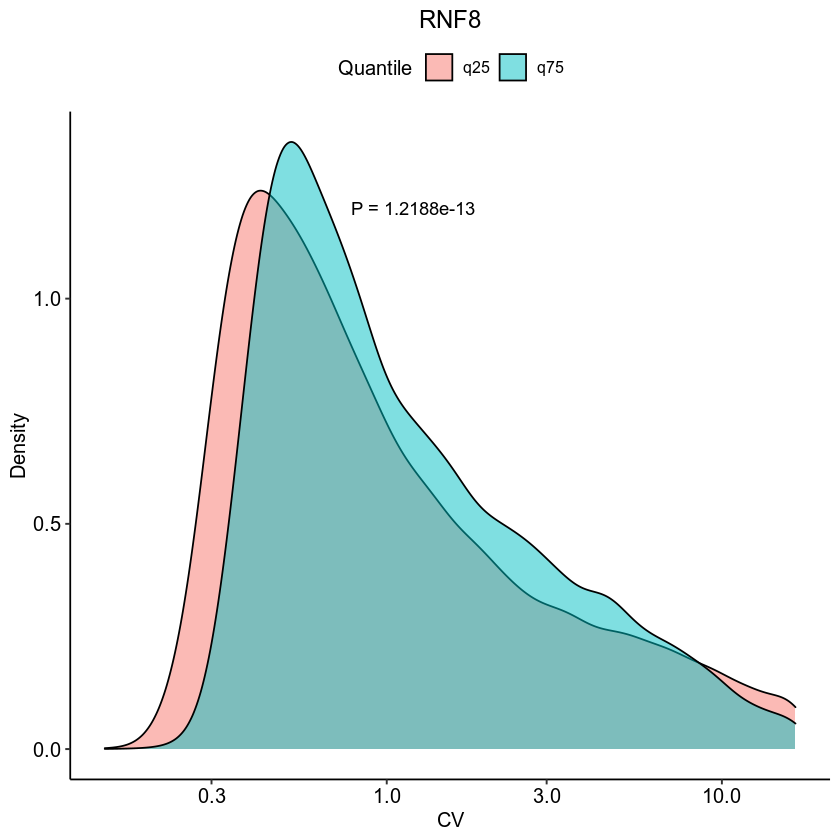

In [57]:
RNF8_CVs = data.frame(genes = TCGA_CV_ratios[['RNF8']][[3]]$Hugo_Symbol, q25 =TCGA_CV_ratios[['RNF8']][[3]]$CV, q75 = TCGA_CV_ratios[['RNF8']][[4]]$CV)
RNF8_CVs = RNF8_CVs %>% pivot_longer(cols = c('q25', 'q75'), names_to = 'Quantile', values_to = 'CV')
saveRDS(RNF8_CVs, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/density_RNF8_CVs.rds')

RNF8_CVs %>%
    ggplot(aes(x = CV, fill = Quantile)) + geom_density(alpha = 0.5) + xlab('CV') + ylab('Density') + ggtitle('RNF8') +
    scale_x_continuous(trans = 'log10') + theme_pubr() + theme(plot.title = element_text(hjust = 0.5)) + annotate('text', x = 1.2, y = 1.2, label = paste0('P = ', adj_pvals_cvs[['RNF8']]))

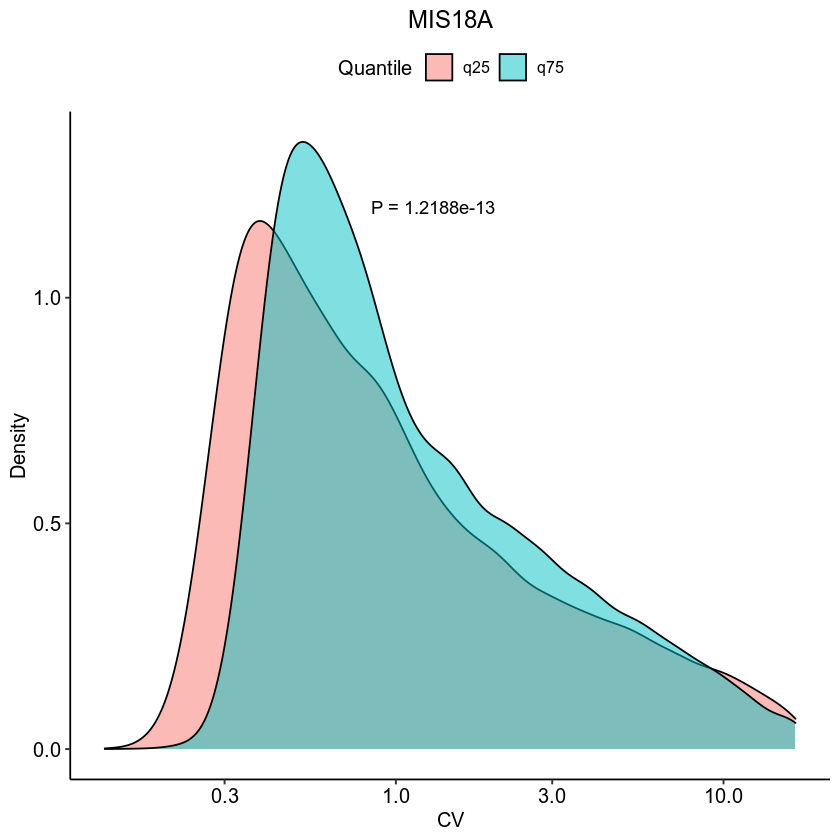

In [58]:
MIS18A_CVs = data.frame(genes = TCGA_CV_ratios[['MIS18A']][[3]]$Hugo_Symbol, q25 =TCGA_CV_ratios[['MIS18A']][[3]]$CV, q75 = TCGA_CV_ratios[['MIS18A']][[4]]$CV)
MIS18A_CVs = MIS18A_CVs %>% pivot_longer(cols = c('q25', 'q75'), names_to = 'Quantile', values_to = 'CV')
saveRDS(MIS18A_CVs, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/density_MIS18A_CVs.rds')

MIS18A_CVs %>%
    ggplot(aes(x = CV, fill = Quantile)) + geom_density(alpha = 0.5) + xlab('CV') + ylab('Density') + ggtitle('MIS18A') +
    scale_x_continuous(trans = 'log10') + theme_pubr() + theme(plot.title = element_text(hjust = 0.5)) + annotate('text', x = 1.3, y = 1.2, label = paste0('P = ', adj_pvals_cvs[['MIS18A']]))

### Means ###

In [61]:
## ks test for pvalues ##
ks_tests = list()
for (i in 1:length(TCGA_CV_ratios)){
    ks_tests[[i]] = ks.test(rowMeans(TCGA_CV_ratios[[i]][[3]][,-1:-4]), rowMeans(TCGA_CV_ratios[[i]][[4]][,-1:-4]), alternative = 'two.sided')$p.value 
}

pvals_means = unlist(ks_tests)
pvals_means[pvals_means == 0] = 2.2e-16 ## < 2.2e-16 is minimum value for pvalue that ks test can return
adj_pvals_means = p.adjust(pvals_means)
adj_pvals_means = as.list(adj_pvals_means)
names(adj_pvals_means) = names(TCGA_CV_ratios)
saveRDS(adj_pvals_means, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/density_adj_pvals_means.rds')

Warning message in ks.test(rowMeans(TCGA_CV_ratios[[i]][[3]][, -1:-4]), rowMeans(TCGA_CV_ratios[[i]][[4]][, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(rowMeans(TCGA_CV_ratios[[i]][[3]][, -1:-4]), rowMeans(TCGA_CV_ratios[[i]][[4]][, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(rowMeans(TCGA_CV_ratios[[i]][[3]][, -1:-4]), rowMeans(TCGA_CV_ratios[[i]][[4]][, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(rowMeans(TCGA_CV_ratios[[i]][[3]][, -1:-4]), rowMeans(TCGA_CV_ratios[[i]][[4]][, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(rowMeans(TCGA_CV_ratios[[i]][[3]][, -1:-4]), rowMeans(TCGA_CV_ratios[[i]][[4]][, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(rowMeans(TCGA_CV_ratios[[i]][[3]][, -1:-4]), rowMeans(TCGA_CV_ratios[[i]][[4]][, :
“p-value will be approximate in the presence of ties”
Warning message 

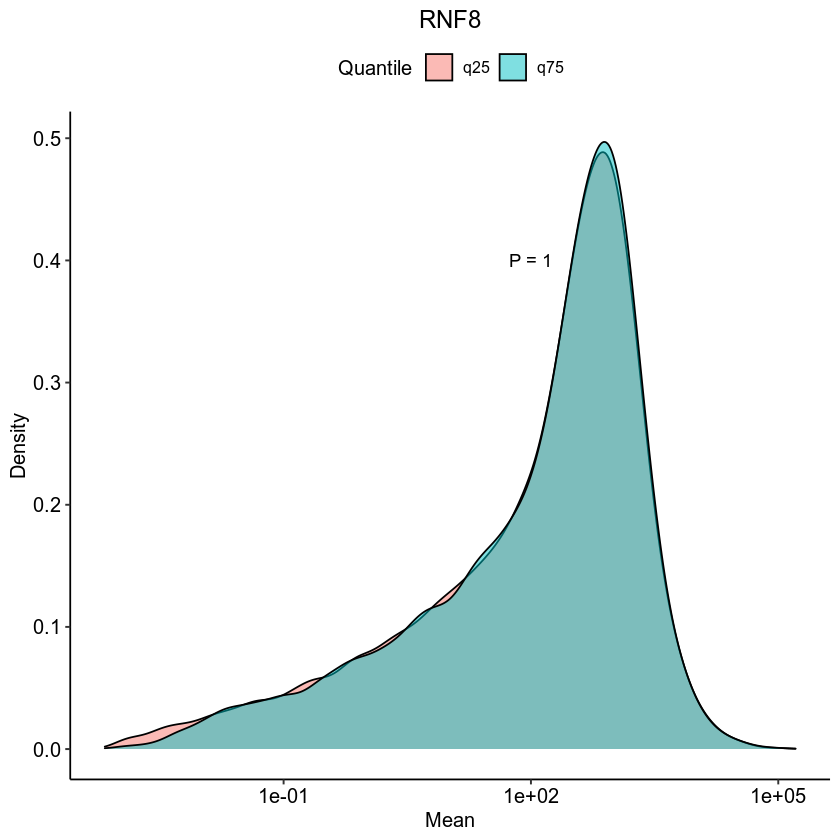

In [59]:
RNF8_means = data.frame(genes = TCGA_CV_ratios[['RNF8']][[3]]$Hugo_Symbol, q25 = rowMeans(TCGA_CV_ratios[['RNF8']][[3]][,-1:-4]), q75 = rowMeans(TCGA_CV_ratios[['RNF8']][[4]][,-1:-4]))
RNF8_means = RNF8_means %>% pivot_longer(cols = c('q25', 'q75'), names_to = 'Quantile', values_to = 'mean')
saveRDS(RNF8_means, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/density_RNF8_means.rds')

RNF8_means %>%
    ggplot(aes(x = mean, fill = Quantile)) + geom_density(alpha = 0.5) + xlab('Mean') + ylab('Density') + ggtitle('RNF8') +
    scale_x_continuous(trans = 'log10') + theme_pubr() + theme(plot.title = element_text(hjust = 0.5)) + annotate('text', x = 100, y = 0.4, label = paste0('P = ', adj_pvals_means[['RNF8']]))

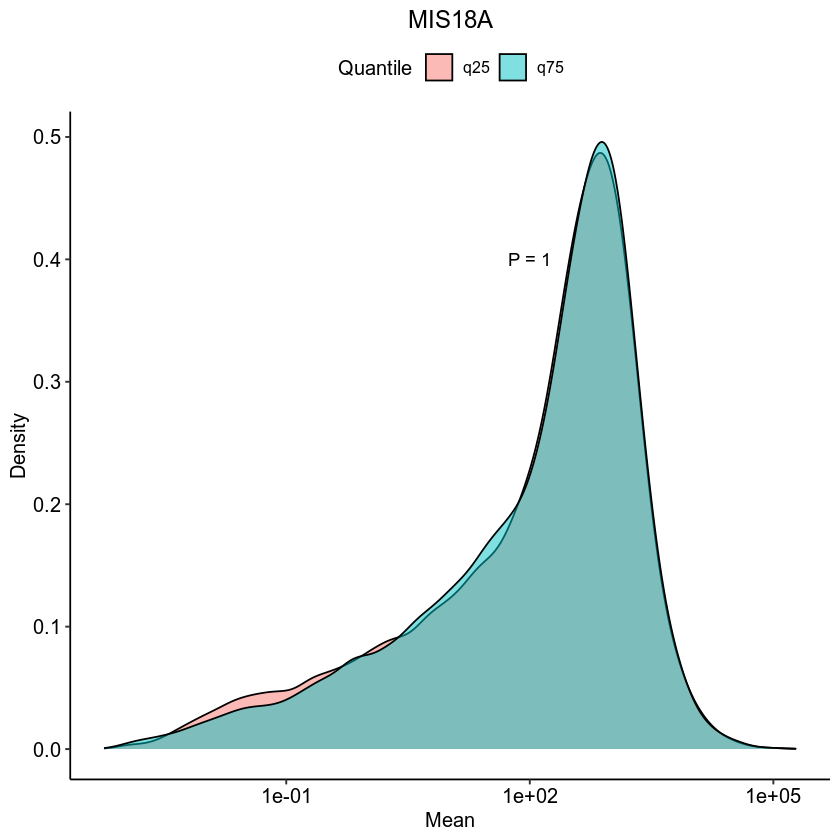

In [60]:
MIS18A_means = data.frame(genes = TCGA_CV_ratios[['MIS18A']][[3]]$Hugo_Symbol, q25 = rowMeans(TCGA_CV_ratios[['MIS18A']][[3]][,-1:-4]), q75 = rowMeans(TCGA_CV_ratios[['MIS18A']][[4]][,-1:-4]))
MIS18A_means = MIS18A_means %>% pivot_longer(cols = c('q25', 'q75'), names_to = 'Quantile', values_to = 'mean')
saveRDS(MIS18A_means, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/density_MIS18A_means.rds')

MIS18A_means %>%
    ggplot(aes(x = mean, fill = Quantile)) + geom_density(alpha = 0.5) + xlab('Mean') + ylab('Density') + ggtitle('MIS18A') + 
    scale_x_continuous(trans = 'log10') + theme_pubr() + theme(plot.title = element_text(hjust = 0.5)) + annotate('text', x = 100, y = 0.4, label = paste0('P = ', adj_pvals_means[['MIS18A']]))